# Adding Synthetic Data to Dataset

In [34]:
import tensorflow as tf

import pathlib
import imageio
import numpy as np

import random

from PIL import Image, ImageDraw, ImageFont



print(tf.__version__)

tf.enable_eager_execution()

1.11.0


In [35]:
data_root = "./data/generated_sets/3class/ali_labels_original/"

# load an array of image paths
def load_image_paths(path):
    
    data_root = pathlib.Path(path)
    
    paths = []
    
    for child in data_root.iterdir():
        if (child.is_dir() and child.name != ".DS_Store"):
            print(child)
            
            subdir_paths = list(child.glob('**/*'))
            subdir_paths = [str(path) for path in subdir_paths if path.name != ".DS_Store"]
        
            paths.append(subdir_paths)
    
    return paths

paths = sorted(load_image_paths(data_root))

data/generated_sets/3class/ali_labels_original/1
data/generated_sets/3class/ali_labels_original/0
data/generated_sets/3class/ali_labels_original/2


data/generated_sets/3class/ali_labels_original/2/IM-0037-0009-0001.dcm.png
(512, 512)
255


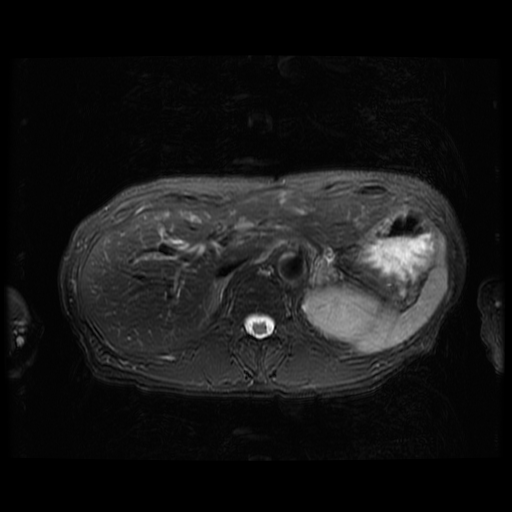

data/generated_sets/3class/ali_labels_original/0/IM-0007-0033-0001.dcm.png
(512, 512)


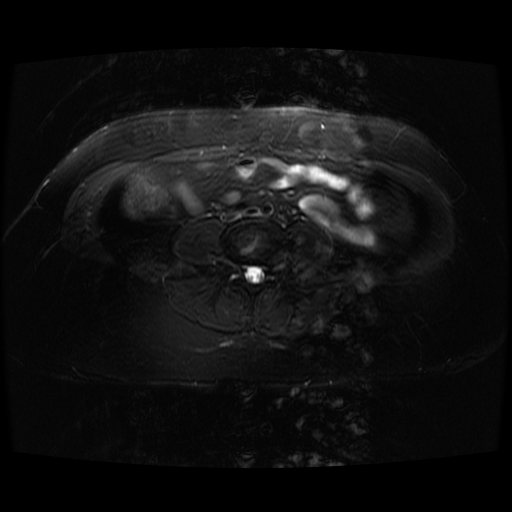

In [36]:
# 2 9 best result

image_path_good = paths[2][30]

print(image_path_good)

im_good = imageio.imread(image_path_good)
print(im_good.shape)


print(np.max(im_good))

display1 = Image.fromarray(im_good)

display(display1)






image_path_bad = paths[0][0]



print(image_path_bad)

im_bad = imageio.imread(image_path_bad)

print(im_bad.shape)

display1 = Image.fromarray(im_bad)

display(display1)


In [30]:
def ifftnc(x, axes):
    tmp = np.fft.fftshift(x, axes=axes)
    tmp = np.fft.ifftn(tmp, axes=axes)
    return np.fft.ifftshift(tmp, axes=axes)

def fftnc(x, axes):
    tmp = np.fft.fftshift(x, axes=axes)
    tmp = np.fft.fftn(tmp, axes=axes)
    return np.fft.ifftshift(tmp, axes=axes)

def fftc(x, axis=0, do_orthonorm=True):
    if do_orthonorm:
        scale = np.sqrt(x.shape[axis])
    else:
        scale = 1.0
    return fftnc(x, (axis,)) / scale

def ifftc(x, axis=0, do_orthonorm=True):
    if do_orthonorm:
        scale = np.sqrt(x.shape[axis])
    else:
        scale = 1.0
    return ifftnc(x, (axis,)) * scale

def fft2c(x, order='C', do_orthonorm=True):
    if order == 'C':
        if do_orthonorm:
            scale = np.sqrt(np.prod(x.shape[-2:]))
        else:
            scale = 1.0
        return fftnc(x, (-2, -1)) / scale
    else:
        if do_orthonorm:
            scale = np.sqrt(np.prod(x.shape[:2]))
        else:
            scale = 1.0
        return fftnc(x, (0, 1)) / scale

def ifft2c(x, order='C', do_orthonorm=True):
    if order == 'C':
        if do_orthonorm:
            scale = np.sqrt(np.prod(x.shape[-2:]))
        else:
            scale = 1.0
        return ifftnc(x, (-2, -1)) * scale
    else:
        if do_orthonorm:
            scale = np.sqrt(np.prod(x.shape[:2]))
        else:
            scale = 1.0
        return ifftnc(x, (0, 1)) * scale

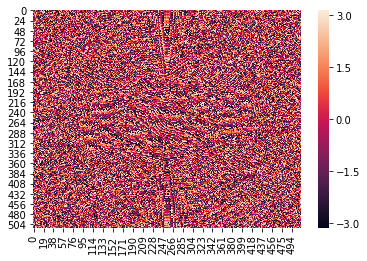

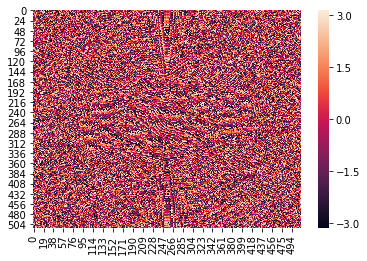

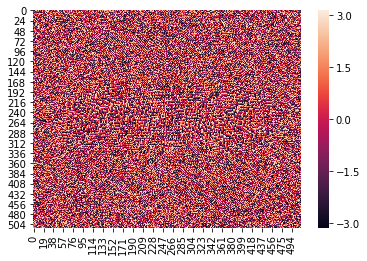

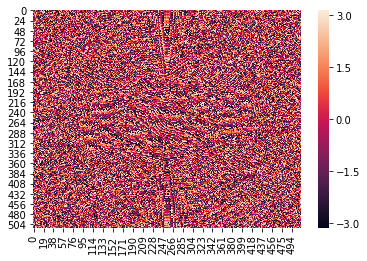

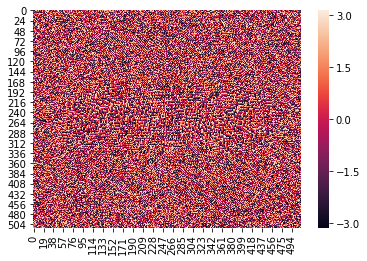

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

im_kspace_bad = fft2c(im_bad)

im_phases_bad = np.angle(im_kspace_bad)


plt.figure()
sns.heatmap(im_phases_bad)
plt.show(0)

im_kspace_good = fft2c(im_good)

im_phases_good = np.angle(im_kspace_good)

plt.figure()
sns.heatmap(im_phases_good)
plt.show(0)

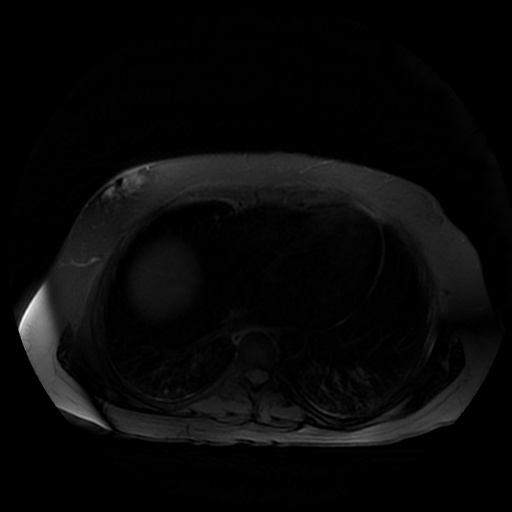

ValueError: invalid axis

In [38]:
# 2 9 best result

import sys
import numpy as np

np.set_printoptions(threshold=sys.maxsize)

def show_img(img):
    display_img = Image.fromarray(img)
    display(display_img)

from scipy import ndimage

image_path_good = paths[2][50]

im_good = imageio.imread(image_path_good)

image_path_bad = paths[0][50]

im_bad = imageio.imread(image_path_bad)


def sobel(img):
    
    x = ndimage.sobel(img, axis=0, mode='constant')
    y = ndimage.sobel(img, axis=1, mode='constant')
    
    h = np.hypot(x, y)

    h *= 255.0 / np.max(h)

    img = np.asarray(h, dtype=np.uint8)
    
    return img



show_img(im_good)
show_img(sobel(im_good))
show_img(im_bad)
show_img(sobel(im_bad))


